In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('Data_Extraction_Transform/dropped_cols_month_earthquake.csv')
data.head()

,Unnamed: 0,id,tsunami,felt,time,latitude,longitude,depth,mag,magType,gap,net,updated,place,type,type_encoder,locationSource
0,0,nn00818986,0,NaN,2021-08-19T02:53:29.951Z,38.541200,-119.463900,3.60,1.30,ml,58.29,nn,2021-08-19T02:56:56.695Z,"3 km NNE of Walker, California",earthquake,1,nn
1,1,ci40014776,0,NaN,2021-08-19T02:49:35.880Z,35.896667,-117.729167,4.48,0.72,ml,72.00,ci,2021-08-19T02:53:05.273Z,"17km ESE of Little Lake, CA",earthquake,1,ci
2,2,ak021am2mkg5,0,NaN,2021-08-19T02:49:14.046Z,59.865100,-153.176400,102.60,1.60,ml,NaN,ak,2021-08-19T03:02:14.791Z,"52 km E of Pedro Bay, Alaska",earthquake,1,ak
3,3,nc73611791,0,NaN,2021-08-19T02:46:16.400Z,38.784668,-122.751000,0.33,1.03,md,84.00,nc,2021-08-19T02:47:54.191Z,"1km NNE of The Geysers, CA",earthquake,1,nc
4,4,ak021am2l4yc,0,NaN,2021-08-19T02:42:46.880Z,56.657400,-157.265100,0.50,2.90,ml,NaN,ak,2021-08-19T02:50:26.938Z,"80 km ENE of Chignik, Alaska",earthquake,1,ak


In [3]:
y = data["type_encoder"]
target_names = ["earthquake", "not an earthquake"]

In [4]:
X = data.drop(["tsunami", "Unnamed: 0", "id", "felt", "time", "magType", "gap", "net", "updated", "place", "type", "locationSource", "type_encoder"], axis =1)
X.head()

,latitude,longitude,depth,mag
0,38.541200,-119.463900,3.60,1.30
1,35.896667,-117.729167,4.48,0.72
2,59.865100,-153.176400,102.60,1.60
3,38.784668,-122.751000,0.33,1.03
4,56.657400,-157.265100,0.50,2.90


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [6]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [7]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.990
k: 3, Train/Test Score: 0.993/0.991
k: 5, Train/Test Score: 0.992/0.990
k: 7, Train/Test Score: 0.992/0.990
k: 9, Train/Test Score: 0.992/0.990
k: 11, Train/Test Score: 0.992/0.989
k: 13, Train/Test Score: 0.990/0.989
k: 15, Train/Test Score: 0.988/0.990
k: 17, Train/Test Score: 0.988/0.990
k: 19, Train/Test Score: 0.988/0.990


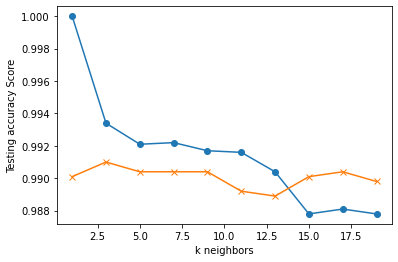

In [8]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")   
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [9]:
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train_scaled, y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=13 Test Acc: 0.989


In [10]:
classifier = LogisticRegression()

In [11]:
classifier.fit(X_train, y_train)

LogisticRegression()

In [12]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.977982385908727
Testing Data Score: 0.9807865505854098


In [14]:
predictions = classifier.predict(X_test)
Model_df = pd.DataFrame({"Prediction": predictions, "Actual": y_test})
Model_df

,Prediction,Actual
8870,1,1
5046,1,1
12788,1,1
3499,1,1
9965,1,1
...,...,...
7224,1,1
5640,1,1
5438,1,1
11880,1,1


In [ ]:
Model_df.to_csv("KNN_ML_Output.csv")